In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt


In [2]:
#число бросков
L = 300

#матрицы переходов и эмиссий
w = float(1 / 6)
a = np.array([[0.95, 0.05], [0.1, 0.9]], float)
e = np.array([[w, w, w, w, w, w], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]], float)

#начальное статическое распределение: px - четная кость, py - нечестная, a - матрица распределения
#qA = q
#(x, y)(a) = (x, y)
#x + y = 1
#получаем систему уравнений:
#0.5x + 0.05y = x
#x + y = 1
#P(x, y) = np.array([2/3], [1/3])

In [3]:
#случайная последовательность при заданных параметрах E и A
def HMM(e, a, L):
    path = []
    s = []
    if random.random() < (2 / 3):
        D = 1
        s.append(1)
        path.append(random.randint(1, 6))
    else:
        D = 0
        s.append(0)
        if random.random() < 0.5:
            path.append(6)
        else:
            path.append(random.randint(1, 5))
    for i in range(L - 1):
        X = random.random()
        K = random.random()
        if (D == 1) and (X < 0.05):
            D = 0
        elif (D == 1) and (X >= 0.05):
            D = 1
        elif (D == 0) and (X < 0.1):
            D = 1
        elif (D == 0) and (X >= 0.1):
            D = 0   
        if D == 1:
            s.append(1)
            path.append(random.randint(1, 6))
        elif D == 0:
            s.append(0)
            if K < 0.5:
                path.append(6)
            else:
                path.append(random.randint(1, 5))
    return(path, s)

path, s = HMM(e, a, L)

#наблюдение:
print(path)

#состояние:
print(s)

[6, 6, 6, 4, 6, 4, 4, 6, 6, 6, 3, 6, 1, 5, 3, 6, 3, 5, 1, 5, 6, 6, 6, 4, 6, 6, 4, 1, 4, 2, 1, 2, 6, 6, 2, 4, 3, 5, 4, 4, 5, 4, 2, 3, 6, 6, 5, 1, 6, 5, 6, 6, 5, 6, 4, 6, 6, 6, 3, 2, 6, 1, 2, 4, 5, 2, 2, 2, 4, 5, 2, 6, 5, 5, 4, 6, 6, 1, 5, 5, 4, 3, 5, 3, 2, 4, 2, 2, 6, 1, 2, 4, 5, 5, 1, 5, 1, 4, 1, 1, 2, 5, 6, 2, 3, 3, 2, 5, 1, 1, 1, 4, 3, 1, 3, 3, 4, 5, 4, 4, 1, 6, 4, 6, 6, 2, 4, 6, 4, 6, 2, 6, 4, 3, 2, 5, 5, 6, 3, 3, 5, 1, 5, 6, 6, 5, 2, 1, 6, 6, 4, 2, 4, 3, 1, 6, 1, 4, 1, 4, 3, 4, 4, 5, 6, 6, 3, 5, 5, 4, 4, 2, 5, 5, 6, 3, 3, 6, 1, 1, 6, 5, 6, 6, 6, 3, 6, 6, 5, 6, 3, 5, 4, 1, 5, 2, 2, 3, 3, 2, 6, 6, 6, 6, 6, 5, 2, 5, 3, 6, 6, 5, 6, 6, 6, 2, 4, 6, 2, 6, 6, 6, 4, 6, 6, 6, 5, 5, 6, 3, 4, 3, 5, 2, 6, 6, 5, 6, 6, 4, 6, 6, 2, 1, 6, 6, 1, 5, 5, 3, 1, 2, 4, 4, 3, 6, 6, 1, 4, 6, 2, 3, 4, 3, 3, 6, 4, 5, 3, 5, 2, 5, 2, 1, 1, 6, 2, 4, 5, 5, 2, 2, 4, 2, 2, 6, 6, 6, 6, 2, 2, 5, 5, 4, 2, 2, 5, 6, 5, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
#Алгоритм Витерби
#Инициализация:
Vk = [[0]*L, [0]*L]
Pv = [[0]*(L - 1), [0]*(L - 1)]
Vk[0][0] = e[0][path[0] - 1]*(2 / 3)
Vk[1][0] = e[1][path[0] - 1]*(1 / 3)
#Рекурсия:
for i in range(1, L):
    Vk[0][i] = e[0][path[i] - 1]*max(Vk[0][i - 1]*a[0][0], Vk[1][i - 1]*a[1][0])
    Vk[1][i] = e[1][path[i] - 1]*max(Vk[1][i - 1]*a[1][1], Vk[0][i - 1]*a[0][1])
    if Vk[0][i - 1]*a[0][0] > Vk[1][i - 1]*a[1][1]:
        Pv[0][i - 1] = 1
    else:
        Pv[0][i - 1] = 0
    if Vk[1][i - 1]*a[1][0] > Vk[0][i - 1]*a[0][1]:
        Pv[1][i - 1] = 0
    else:
        Pv[1][i - 1] = 1

#Нахождение наиболее вероятной траектории:
piv = [0]*L
if Vk[0][L - 1] > Vk[1][L - 1]:
    piv[L - 1] = 1
else:
    piv[L - 1] = 0
for i in range(L - 1):
    piv[L - (i + 2)] = Pv[piv[L - (i + 1)]][L - (i + 2)]
#Наиболее вероятная траектория:
print(piv)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


0.8166666666666667


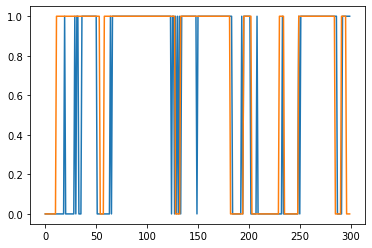

In [15]:
eq = 0
for i in range(L):
    if s[i] == piv[i]:
        eq = eq + 1
print(eq / L)

plt.plot(piv)
plt.plot(s)
plt.show()

In [8]:
#Алоритм просмотра вперед
def forward(e, a, path, L):
    fk = [[0]*(L), [0]*(L)]
    fk[0][0] = 2 / 3
    fk[1][0] = 1 / 3
    fk[0][1] = e[0][path[0]-1]*fk[0][0]
    fk[1][1] = e[1][path[0]-1]*fk[1][0]
    for i in range(2, L):
        fk[0][i] = e[0][path[i-1]-1]*(fk[0][i-1]*a[0][0] + fk[1][i-1]*a[1][0])
        fk[1][i] = e[1][path[i-1]-1]*(fk[1][i-1]*a[1][1] + fk[0][i-1]*a[0][1])
    return(fk)


fk = forward(e,a, path, L)
resf = fk[0][-1] + fk[1][-1]

#состояние 0 - честная кость:
print(fk[0])

#состояние 1 - нечестная кость:
print(fk[1])

#проверка
print(resf)

[0.6666666666666666, 0.1111111111111111, 0.020370370370370365, 0.004521604938271604, 0.0013077417695473248, 0.00026069980281207125, 6.596067136774118e-05, 1.2686986183151384e-05, 2.2161587244395934e-06, 4.4950170272752976e-07, 1.1646895951144275e-07, 3.901224642626098e-08, 8.038064269442702e-09, 2.1264549753841586e-09, 4.141970750699611e-10, 7.27341614910981e-11, 1.219452487346491e-11, 2.2663328590717057e-12, 3.900502242953873e-13, 6.475609019650534e-14, 1.0555384221280841e-14, 1.7038758038342497e-15, 2.8885139832510906e-16, 5.502673120951532e-17, 1.3014287437759931e-17, 2.452336021575582e-18, 5.699923862838174e-19, 1.7303823346105192e-19, 3.4896269170473814e-20, 6.2145318699694286e-21, 1.0489116011273622e-21, 1.7244051278872806e-22, 2.7963146326563167e-23, 4.501274073256205e-24, 7.575521964326341e-25, 1.4200400597420456e-25, 2.453233870079848e-26, 4.080474026063725e-27, 6.6577625154451315e-28, 1.0752772043098464e-28, 1.7270887010147247e-29, 2.7656275680809508e-30, 4.421266134296834e-3

In [9]:
#Алоритм просмотра назад
def backward(e, a, path, L):
    bk = [[0]*(L), [0]*(L)]
    bk[0][-1] = 1
    bk[1][-1] = 1
    for i in range(L-2,-1,-1):
        bk[0][i] = (e[0][path[i]-1]*bk[0][i+1]*a[0][0] + e[1][path[i]-1]*bk[1][i+1]*a[0][1])
        bk[1][i] = (e[1][path[i]-1]*bk[1][i+1]*a[1][1] + e[0][path[i]-1]*bk[0][i+1]*a[1][0])
    return(bk)


bk = backward(e,a, path, L)

print(bk[0])
print(bk[1])

#проверка
resb = bk[0][0]*(2/3) + bk[1][0]*(1/3)
print(resb)

[2.487866693022743e-224, 7.020128384400969e-224, 2.5167690458651957e-223, 1.1703835262982079e-222, 6.498443396398451e-222, 3.1298582386405223e-221, 1.7705685960467853e-220, 8.943908999122308e-220, 3.1800150969547394e-219, 1.468402283390921e-218, 8.121551238127103e-218, 4.901940780898447e-217, 2.859954141955793e-216, 1.7641572116704888e-215, 1.0736726590771203e-214, 6.367975706148425e-214, 3.58382099729227e-213, 2.178861462688878e-212, 1.2896599776836072e-211, 7.226782225120561e-211, 3.564641940385875e-210, 1.1473495954148437e-209, 4.8212726094886e-209, 2.520834694622195e-208, 1.4843018987477301e-207, 8.224811910127065e-207, 4.968176959877038e-206, 3.1056373546999885e-205, 1.9370511559726584e-204, 1.2033221289167857e-203, 7.420226805910772e-203, 4.51318254977216e-202, 2.6735363713106526e-201, 1.5007760745759723e-200, 9.114613763331548e-200, 5.709102067930427e-199, 3.573875086138127e-198, 2.2348383971618266e-197, 1.3948048942214653e-196, 8.674779459916321e-196, 5.3606965058194416e-195, 3

In [10]:
#еще одна проверка
for i in range(L):
    print(fk[0][i]*bk[0][i] + fk[1][i]*bk[1][i])


9.955656701550702e-224
9.9556567015507e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550706e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550702e-224
9.955656701550704e-224
9.955656701550704e-224
9.955656701550702e-224
9.955656701550702e-224
9.9556567015507e-224
9.9556567015507e-224
9.9556567015507e-224
9.955656701550702e-

[0.16659652347093853, 0.0783488511422804, 0.05149586726204841, 0.053155829804350636, 0.0853613791763787, 0.08195877480550616, 0.11730807600034472, 0.11397666000029295, 0.07078807970415618, 0.066298923964544, 0.09501217756697047, 0.19208750105009312, 0.23090887813677677, 0.37681099224044556, 0.4466928584460559, 0.46523236715288313, 0.4389765095728869, 0.49600196916067835, 0.5052727094154655, 0.4700625741017333, 0.37793755269006374, 0.19636486801135558, 0.1398834227319645, 0.1393311333676163, 0.19403171617706522, 0.2025984133698263, 0.2844436209215121, 0.5397875978831576, 0.6789693594524072, 0.7511391708422455, 0.7817828811336717, 0.7817219260590113, 0.7509347801105262, 0.6785493550817023, 0.6935550193259924, 0.8143263558248847, 0.8806602790334226, 0.9159817685003464, 0.9327641580550542, 0.9369339346755912, 0.9299636018312877, 0.909391675315754, 0.8679534414712495, 0.7910155161499404, 0.6514082516060073, 0.399831121674034, 0.32341147074905274, 0.32857268706115983, 0.28715015742220823, 0.

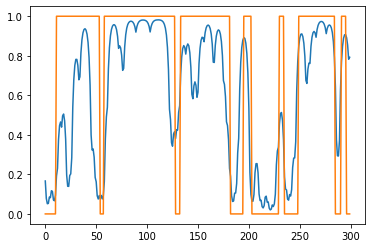

In [31]:
#Апостериорное дешифрование
def aposter(fkk, bkk, L):
    apstr = [0]*(L)
    for i in range(L):
        apstr[i] = (fkk[0][i]*bkk[0][i])/(fkk[0][-1] + fkk[1][-1])
    return(apstr)


apstr = aposter(fk, bk, L)
print(apstr)
plt.plot(apstr)
plt.plot(s)
plt.show()

In [34]:
#Обучение Баума-Уэлша:
#Введем случаные нормированные матрицы переходов и эмиссий
a_r = np.array([[0.5, 0.5], [0.3, 0.7]], float)
e_r = np.array([[0.11, 0.22, 0.18, 0.19, 0.1, 0.2], [0.15, 0.2, 0.13, 0.17, 0.25, 0.1]], float)
#Рассмотрим некоторое количество последовательноестей:
N = 200
path_bw = np.zeros((N, L), int)
s_bw = np.zeros((N, L), int)
fk_bw = np.zeros((N, 2, L))
bk_bw = np.zeros((N, 2, L))
apstr_bw = np.zeros((N, L))

#Генерируем последовательности
for i in range(N):
    path_bw[i], s_bw[i] = HMM(e, a, L)


In [35]:
#считаем количество переходов, составляем нормированные матрицы Е и А
for j in range(N):
    A00 = int(0)
    A01 = int(0)
    A10 = int(0)
    A11 = int(0)
    E00 = int(0)
    E01 = int(0)
    E02 = int(0)
    E03 = int(0)
    E04 = int(0)
    E05 = int(0)
    E10 = int(0)
    E11 = int(0)
    E12 = int(0)
    E13 = int(0)
    E14 = int(0)
    E15 = int(0)
    fk_bw[j] = forward(e_r, a_r, path_bw[j], L)
    bk_bw[j] = backward(e_r, a_r, path_bw[j], L)
    apstr_bw[j] = aposter(fk_bw[j], bk_bw[j], L)
    for i in range(L - 1):
        if (apstr_bw[j][i] < 0.5) and (apstr_bw[j][i+1] < 0.5):
            A00 = A00 + 1
        elif (apstr_bw[j][i] < 0.5) and (apstr_bw[j][i+1] >= 0.5):
            A01 = A01 + 1
        elif (apstr_bw[j][i] >= 0.5) and (apstr_bw[j][i+1] < 0.5):
            A10 = A10 + 1
        elif (apstr_bw[j][i] >= 0.5) and (apstr_bw[j][i+1] >= 0.5):
            A11 = A11 + 1    
        if apstr_bw[j][i] > 0.5:    
            if path_bw[j][i] == 1:
                E00 = E00 + 1
            elif path_bw[j][i] == 2:
                E01 = E01 + 1
            elif path_bw[j][i] == 3:
                E02 = E02 + 1
            elif path_bw[j][i] == 4:
                E03 = E03 + 1
            elif path_bw[j][i] == 5:
                E04 = E04 + 1
            elif path_bw[j][i] == 6:
                E05 = E05 + 1
        elif apstr_bw[j][i] <= 0.5:    
            if path_bw[j][i] == 1:
                E10 = E10 + 1
            elif path_bw[j][i] == 2:
                E11 = E11 + 1
            elif path_bw[j][i] == 3:
                E12 = E12 + 1
            elif path_bw[j][i] == 4:
                E13 = E13 + 1
            elif path_bw[j][i] == 5:
                E14 = E14 + 1
            elif path_bw[j][i] == 6:
                E15 = E15 + 1
    if apstr_bw[j][-1] > 0.5:    
        if path_bw[j][i] == 1:
            E00 = E00 + 1
        elif path_bw[j][i] == 2:
            E01 = E01 + 1
        elif path_bw[j][i] == 3:
            E02 = E02 + 1
        elif path_bw[j][i] == 4:
            E03 = E03 + 1
        elif path_bw[j][i] == 5:
            E04 = E04 + 1
        elif path_bw[j][i] == 6:
            E05 = E05 + 1
    elif apstr_bw[j][i] <= 0.5:    
        if path_bw[j][i] == 1:
            E10 = E10 + 1
        elif path_bw[j][i] == 2:
            E11 = E11 + 1
        elif path_bw[j][i] == 3:
            E12 = E12 + 1
        elif path_bw[j][i] == 4:
            E13 = E13 + 1
        elif path_bw[j][i] == 5:
            E14 = E14 + 1
        elif path_bw[j][i] == 6:
            E15 = E15 + 1
    sumA0 = A00 + A01
    sumA1 = A10 + A11
    print(A00, A01, A10, A11)
    if sumA0 != 0:
        a_r[0][0] = (a_r[0][0] + (A00 / sumA0)) / 2
        a_r[0][1] = (a_r[0][1] + (A01 / sumA0)) / 2
    else:
        a_r[0][0] = a_r[0][0]
        a_r[0][1] = a_r[0][1]
    if sumA1 != 0:
        a_r[1][0] = (a_r[1][0] + (A10 / sumA1)) / 2
        a_r[1][1] = (a_r[1][1] + (A11 / sumA1)) / 2
    else:
        a_r[1][0] = a_r[1][0]
        a_r[1][1] = a_r[1][1]
    sumE0 = E00 + E01 + E02 + E03 + E04 + E05
    sumE1 = E10 + E11 + E12 + E13 + E14 + E15
    if sumE0 != 0:
        e_r[0][0] = (e_r[0][0] + (E00/sumE0)) / 2
        e_r[0][1] = (e_r[0][1] + (E01/sumE0)) / 2
        e_r[0][2] = (e_r[0][2] + (E02/sumE0)) / 2
        e_r[0][3] = (e_r[0][3] + (E03/sumE0)) / 2
        e_r[0][4] = (e_r[0][4] + (E04/sumE0)) / 2
        e_r[0][5] = (e_r[0][5] + (E05/sumE0)) / 2
    else:
        e_r[0][0] = e_r[0][0]
        e_r[0][1] = e_r[0][1]
        e_r[0][2] = e_r[0][2]
        e_r[0][3] = e_r[0][3]
        e_r[0][4] = e_r[0][4]
        e_r[0][5] = e_r[0][5]
    if sumE1 != 0:
        e_r[1][0] = (e_r[1][0] + (E10/sumE1)) / 2
        e_r[1][1] = (e_r[1][1] + (E11/sumE1)) / 2
        e_r[1][2] = (e_r[1][2] + (E12/sumE1)) / 2
        e_r[1][3] = (e_r[1][3] + (E13/sumE1)) / 2
        e_r[1][4] = (e_r[1][4] + (E14/sumE1)) / 2
        e_r[1][5] = (e_r[1][5] + (E15/sumE1)) / 2
    else:
        e_r[1][0] = e_r[1][0]
        e_r[1][1] = e_r[1][1]
        e_r[1][2] = e_r[1][2]
        e_r[1][3] = e_r[1][3]
        e_r[1][4] = e_r[1][4]
        e_r[1][5] = e_r[1][5]
print(a_r, e_r)

174 41 41 43
81 47 47 124
82 60 60 97
100 51 51 97
62 49 49 139
162 37 38 62
141 40 41 77
67 38 38 156
149 33 34 83
139 31 32 97
114 23 24 138
136 25 26 112
140 19 19 121
176 16 15 92
184 15 16 84
126 15 15 143
128 10 11 150
174 10 10 105
107 11 10 171
149 12 12 126
126 7 6 160
215 6 6 72
167 5 5 122
85 7 7 200
193 6 7 93
144 6 6 143
140 6 5 148
169 6 6 118
149 7 7 136
176 4 3 116
180 5 5 109
172 4 4 119
93 5 6 195
134 6 7 152
176 5 6 112
186 4 3 106
132 6 6 155
129 6 5 159
155 5 5 134
117 6 6 170
165 5 4 125
177 9 9 104
183 8 8 100
119 4 5 171
174 5 6 114
185 8 8 98
160 5 6 128
89 4 4 202
123 5 4 167
74 4 4 217
90 6 7 196
143 4 5 147
73 5 5 216
217 3 4 75
264 2 3 30
193 2 3 101
120 4 4 171
151 7 7 134
165 4 5 125
144 2 3 150
201 5 4 89
173 6 7 113
135 6 5 153
120 6 6 167
151 6 6 136
120 2 3 174
175 2 3 119
61 4 3 231
214 2 3 80
177 3 2 117
164 5 5 125
171 4 4 120
184 3 3 109
118 5 6 170
236 5 5 53
197 3 3 96
190 5 4 100
149 4 4 142
123 4 4 168
205 3 2 89
169 3 3 124
118 2 2 177
107 4 